In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from datetime import datetime

In [2]:
all_file=os.listdir('./')
file=[]
for each_file in all_file:
    try:
        if  each_file.split('.')[1]=='csv':
            file.append(each_file)
    except: continue
file

['40_data.csv',
 '37_data.csv',
 '36_data.csv',
 '6_data.csv',
 '57_data.csv',
 '20_data.csv',
 '21_data.csv',
 '14_data.csv',
 '15_data.csv',
 '19_data.csv',
 '18_data.csv',
 '50_data.csv',
 '51_data.csv',
 '1_data.csv',
 '26_data.csv',
 '13_data.csv',
 '47_data.csv',
 '46_data.csv',
 '31_data.csv',
 '17_data.csv',
 '16_data.csv',
 '28_data.csv',
 '5_data.csv',
 '4_data.csv',
 '54_data.csv',
 '55_data.csv',
 '23_data.csv',
 '48_data.csv',
 '43_data.csv',
 '42_data.csv',
 '34_data.csv',
 '35_data.csv',
 '44_data.csv',
 '45_data.csv',
 '33_data.csv',
 '32_data.csv',
 '8_data.csv',
 '9_data.csv',
 '59_data.csv',
 '58_data.csv',
 '10_data.csv',
 '11_data.csv',
 '53_data.csv',
 '52_data.csv',
 '2_data.csv',
 '3_data.csv',
 '24_data.csv',
 '25_data.csv']

In [3]:
df=None
for f in file:

    data=pd.read_csv(f)
    if df is None:
        df=data
    else:
        df=pd.concat([df,data])
df['home_time'].value_counts().to_frame()

,count
home_time,
0.0,117
84000.0,30
72000.0,24
1200.0,20
76800.0,20
...,...
198000.0,1
59701.0,1
279788.0,1


In [4]:
# df=df.drop('Unnamed: 0',axis=1)
df.describe()

,home_time,school_time,travel_time,date_in_week,cut_class,class_schedule,volunteer,recreational_activities,orthers,working,shopping
count,2.448000e+03,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2307.000000,2243.000000,1416.000000,1142.000000
mean,7.434019e+04,9409.950572,5144.855801,2.073938,0.344363,3771.323529,28.847222,3680.350238,3473.988408,5028.603107,819.613835
std,8.137987e+04,26633.683336,25165.673467,1.950094,0.475257,4412.840559,18.116488,13114.281989,19165.354626,19240.767489,7681.506092
min,0.000000e+00,0.000000,0.000000,-1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3.815875e+04,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000
50%,7.080600e+04,1200.000000,0.000000,2.000000,0.000000,3000.000000,28.000000,0.000000,0.000000,0.000000,0.000000
75%,8.526625e+04,7200.000000,0.000000,4.000000,1.000000,6900.000000,46.000000,3535.500000,0.000000,0.000000,0.000000
max,1.645748e+06,550234.000000,629181.000000,5.000000,1.000000,17100.000000,59.000000,251813.000000,395753.000000,232391.000000,117600.000000


In [5]:
def offset(data):
    try:
        if float(data)>86400:
            return 0
        return data
    except:
        return data
def to_min(time):
    try:
        return int(time/60)
    except: return time
    
time_type='%d:%m:%Y '
week=[]
def transform_week(time):
        time=datetime.strptime(time,time_type)
        return datetime.strftime(time,'%W')
for date in df.date.values:
    week.append(transform_week(date))
df['week']=week
for col in [ 'home_time', 'school_time', 'travel_time',
            'recreational_activities', 'orthers','working', 'shopping']:
    df[col]=df[col].apply(lambda x: offset(x))
    df[col]=df[col].fillna(0)

for col in [ 'home_time', 'school_time', 'travel_time',
            'recreational_activities', 'orthers','working', 'shopping']:
    df[col]=df[col].apply(lambda x: to_min(x))
df['date_in_week']=df['date_in_week'].values+1
df['None_school_time']=1440-df.school_time-df.home_time
df.columns

Index(['date', 'home_time', 'school_time', 'travel_time', 'date_in_week',
       'cut_class', 'class_schedule', 'volunteer', 'recreational_activities',
       'orthers', 'working', 'shopping', 'week', 'None_school_time'],
      dtype='object')

In [6]:
df['home_time'].value_counts().to_frame()

,count
home_time,
0,691
1400,47
1340,39
1200,34
1240,31
...,...
995,1
1429,1
456,1


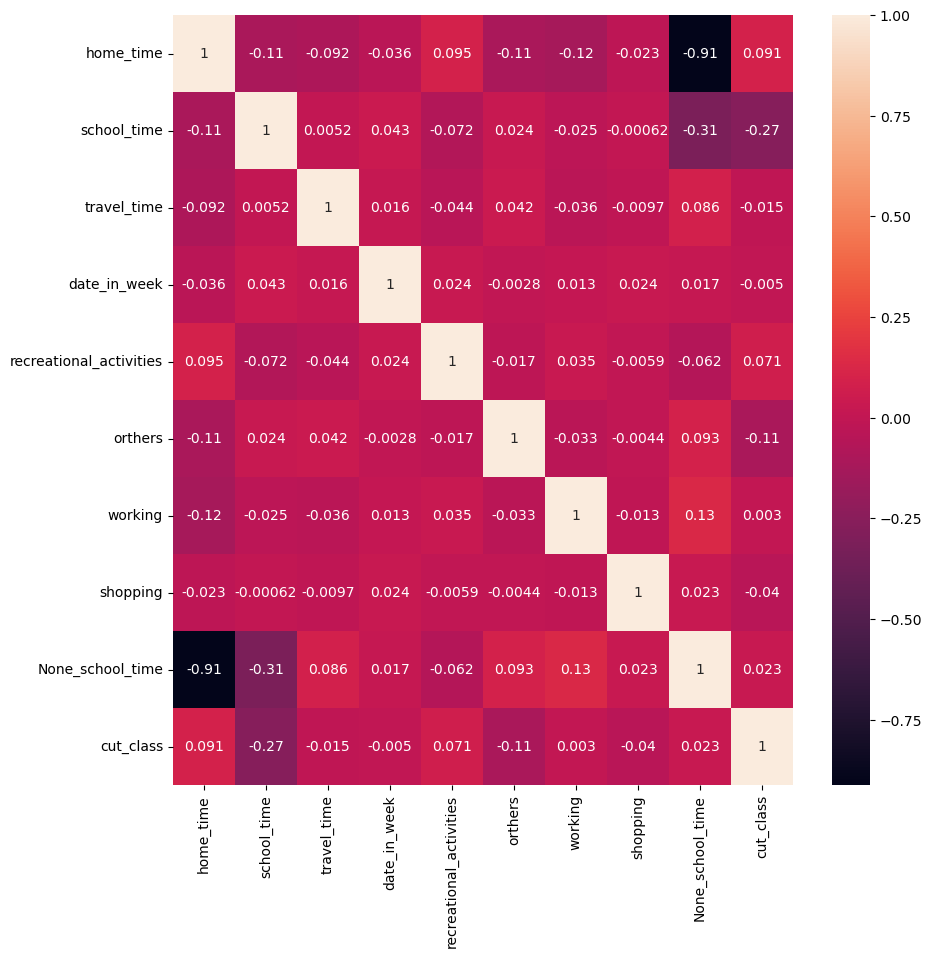

In [7]:
corr=df[[ 'home_time', 'school_time', 'travel_time', 'date_in_week',
        'recreational_activities', 'orthers',
       'working', 'shopping','None_school_time','cut_class']].corr()
ax,fig=plt.subplots(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.savefig('../image/corr.png')

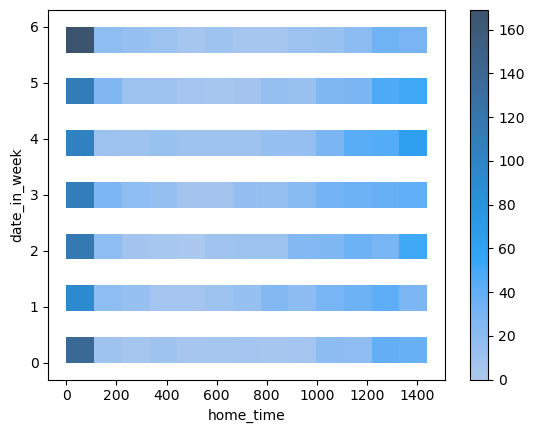

In [8]:
sns.histplot(df,x='home_time',y='date_in_week',cbar=True)
plt.savefig('../image/hometime vs day.png')

In [9]:
df

,date,home_time,school_time,travel_time,date_in_week,cut_class,class_schedule,volunteer,recreational_activities,orthers,working,shopping,week,None_school_time
0,03:04:2013,20,120,0,3,1.0,11700.0,40,0,0,0,0,13,1300
1,04:04:2013,400,1100,0,4,0.0,7800.0,40,0,0,0,0,13,-60
2,05:04:2013,440,1200,0,5,0.0,9000.0,40,0,0,0,0,13,-200
3,06:04:2013,620,600,0,6,0.0,0.0,40,0,0,0,0,13,220
4,07:04:2013,0,120,0,0,0.0,0.0,40,0,0,0,0,13,1320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,26:04:2013,361,0,0,5,1.0,6000.0,25,0,0,0,0,16,1079
25,28:03:2013,0,20,0,4,1.0,6900.0,25,0,0,0,0,12,1420
26,29:03:2013,179,40,0,5,1.0,6000.0,25,0,0,0,0,12,1221
27,30:03:2013,0,0,0,6,0.0,0.0,25,0,0,0,0,12,1440


In [10]:
df=df.sort_values(['week','date'])
df

,date,home_time,school_time,travel_time,date_in_week,cut_class,class_schedule,volunteer,recreational_activities,orthers,working,shopping,week,None_school_time
50,27:03:2013,159,20,0,3,1.0,11700.0,6,0,0,0,0,12,1261
44,27:03:2013,80,79,0,3,0.0,0.0,57,0,0,0,0,12,1281
51,27:03:2013,60,79,0,3,1.0,11700.0,20,39,0,0,0,12,1301
49,27:03:2013,0,119,0,3,0.0,3900.0,15,59,0,0,0,12,1321
41,27:03:2013,99,140,0,3,1.0,10500.0,19,0,0,0,0,12,1201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,31:05:2013,421,279,0,5,0.0,0.0,58,0,0,10,0,21,740
63,31:05:2013,0,0,0,5,1.0,6000.0,11,200,0,0,0,21,1440
65,31:05:2013,0,0,0,5,0.0,0.0,53,0,0,20,0,21,1440
61,31:05:2013,1410,0,0,5,0.0,0.0,52,0,0,0,0,21,30


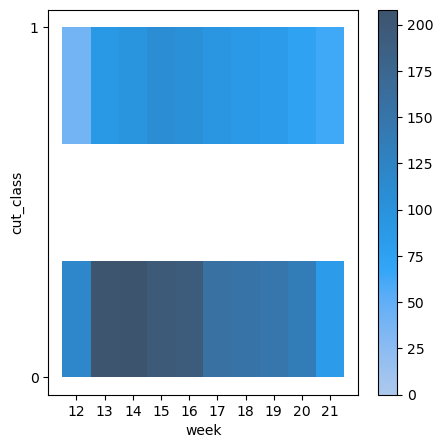

In [11]:
ax,fig=plt.subplots(figsize=(5,5))
sns.histplot(df,x='week',y='cut_class',cbar=True,bins=3)
plt.yticks([0,1])
plt.savefig('../image/cutclass vs week.png')

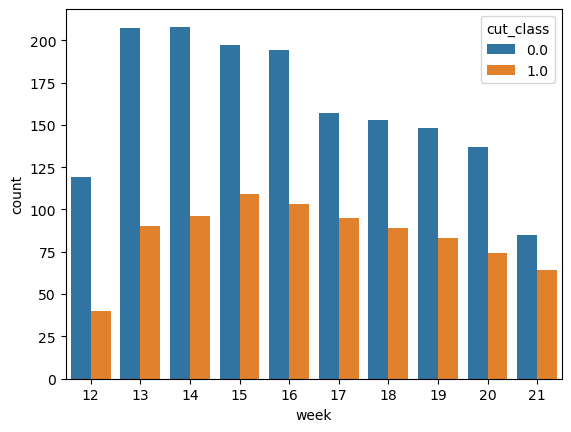

In [12]:
sns.countplot(df,x='week',hue='cut_class')
plt.savefig('../image/count cutclass vs week.png')

array([  20,   79,  119,  140,  120,  320,  220,   60,   39,   40,  160,
          0,   80,  139,   59,  179,  660,  960, 1066,  339,   31,   99,
        180,  240,  399,  340,  100, 1320, 1180, 1399,  380,   19,  279,
        239, 1240,  300,  798,  800,  280,  260,  138,  200, 1019,   50,
       1220,   18,  579,  440,  980,   21, 1179,  720,  360, 1100,  560,
       1060,   81,  451,  141,  539,  129,  185,   41,   78, 1200,  514,
       1360,  420,  591,  580,  219,  600,  620,  559,  500,  201,  358,
       1340,  760,  900, 1020,  400,  540,  281,  319,   58,  679,  640,
       1300,   51, 1219,  158,  421,  700,  217,  581,  269, 1160,  449,
       1040, 1121,  101,  639,  599,  418,   38,  480,   25,  353,  460,
        199,  999, 1048, 1080, 1120, 1176,  918, 1310,  359,   62, 1207,
        520, 1181,  919,  134, 1291,  419,  939,   95,  259, 1259,  741,
        278,  161, 1000,  880, 1260,   61, 1017,  302,  159,  739,   36,
       1001,  341,  221,  780,  740,   66,  311,  1

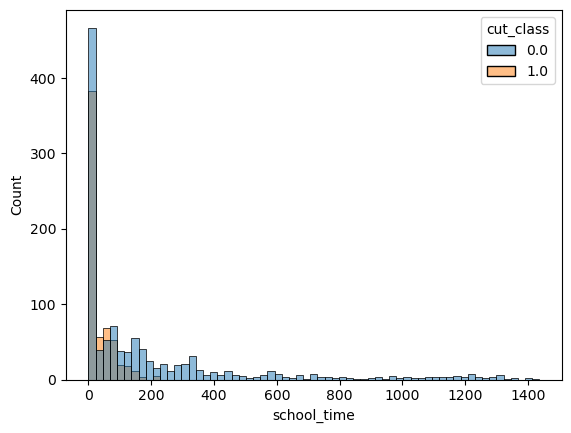

In [13]:
df=df.reset_index(drop=True)
df_new=df.drop(df[df['home_time']==0].index)

sns.histplot(df_new,x='school_time',hue='cut_class')

df_new.describe()
df['school_time'].unique()


In [14]:
df.school_time.value_counts

<bound method IndexOpsMixin.value_counts of 0        20
1        79
2        79
3       119
4       140
       ... 
2443    279
2444      0
2445      0
2446      0
2447      0
Name: school_time, Length: 2448, dtype: int64>

In [15]:
df

,date,home_time,school_time,travel_time,date_in_week,cut_class,class_schedule,volunteer,recreational_activities,orthers,working,shopping,week,None_school_time
0,27:03:2013,159,20,0,3,1.0,11700.0,6,0,0,0,0,12,1261
1,27:03:2013,80,79,0,3,0.0,0.0,57,0,0,0,0,12,1281
2,27:03:2013,60,79,0,3,1.0,11700.0,20,39,0,0,0,12,1301
3,27:03:2013,0,119,0,3,0.0,3900.0,15,59,0,0,0,12,1321
4,27:03:2013,99,140,0,3,1.0,10500.0,19,0,0,0,0,12,1201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2443,31:05:2013,421,279,0,5,0.0,0.0,58,0,0,10,0,21,740
2444,31:05:2013,0,0,0,5,1.0,6000.0,11,200,0,0,0,21,1440
2445,31:05:2013,0,0,0,5,0.0,0.0,53,0,0,20,0,21,1440
2446,31:05:2013,1410,0,0,5,0.0,0.0,52,0,0,0,0,21,30
